In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torch.utils.data import random_split

In [3]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [5]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [7]:
# Load the entire dataset
data_dir = 'dataset_v2'
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=data_transforms['train'])

# Determine sizes for train and validation splits
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Perform the split
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

In [23]:
# Create dataloaders
dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4),
    'val': torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4)
}

# Update dataset sizes
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Print dataset sizes
print(f"Training samples: {dataset_sizes['train']}, Validation samples: {dataset_sizes['val']}")

# Get class names
class_names = full_dataset.classes
print(f"Class names: {class_names}")

Training samples: 3959, Validation samples: 990
Class names: ['calamansi', 'carrots', 'chili', 'kamatis', 'manga', 'mansanas', 'pineapple', 'saging', 'sibuyas', 'talong']


In [25]:
from torchvision import models

# Load the pre-trained MobileNet_v2 model
model = models.mobilenet_v2(pretrained=True)

# Customize the classifier for your number of classes
num_classes = len(class_names)  # Replace with your actual number of classes
model.classifier[1] = nn.Linear(model.last_channel, num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
# Training loop
from tqdm import tqdm
import numpy as np

train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []
num_epochs = 20

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 20)
    
    # Metrics initialization
    epoch_train_loss = 0.0
    epoch_train_corrects = 0
    epoch_val_loss = 0.0
    epoch_val_corrects = 0
    
    # Training phase
    model.train()
    train_loader = tqdm(dataloaders['train'], desc="Training", leave=False)
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * inputs.size(0)
        epoch_train_corrects += torch.sum(preds == labels.data)

    epoch_train_loss /= dataset_sizes['train']
    epoch_train_acc = epoch_train_corrects.double() / dataset_sizes['train']
    train_loss_history.append(epoch_train_loss)
    train_acc_history.append(epoch_train_acc.item())

    print(f"Train Loss: {epoch_train_loss:.4f} Acc: {epoch_train_acc:.4f}")

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_loader = tqdm(dataloaders['val'], desc="Validating", leave=False)
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            epoch_val_loss += loss.item() * inputs.size(0)
            epoch_val_corrects += torch.sum(preds == labels.data)

    epoch_val_loss /= dataset_sizes['val']
    epoch_val_acc = epoch_val_corrects.double() / dataset_sizes['val']
    val_loss_history.append(epoch_val_loss)
    val_acc_history.append(epoch_val_acc.item())

    print(f"Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}")

print("Training complete!")

Epoch 1/20
--------------------


Train Loss: 1.6574 Acc: 0.4309


Val Loss: 1.1739 Acc: 0.6071
Epoch 2/20
--------------------


Train Loss: 1.3161 Acc: 0.5640


Val Loss: 1.0364 Acc: 0.6566
Epoch 3/20
--------------------


Train Loss: 1.2101 Acc: 0.5946


Val Loss: 0.9860 Acc: 0.6606
Epoch 4/20
--------------------


Train Loss: 1.1322 Acc: 0.6214


Val Loss: 0.9289 Acc: 0.6949
Epoch 5/20
--------------------


Train Loss: 1.1005 Acc: 0.6320


Val Loss: 0.9527 Acc: 0.7061
Epoch 6/20
--------------------


Train Loss: 1.0183 Acc: 0.6595


Val Loss: 0.8160 Acc: 0.7444
Epoch 7/20
--------------------


Train Loss: 1.0143 Acc: 0.6673


Val Loss: 0.7638 Acc: 0.7394
Epoch 8/20
--------------------


Train Loss: 0.9316 Acc: 0.6936


Val Loss: 0.6553 Acc: 0.7929
Epoch 9/20
--------------------


Train Loss: 0.9114 Acc: 0.7093


Val Loss: 0.6923 Acc: 0.7737
Epoch 10/20
--------------------


Train Loss: 0.8954 Acc: 0.6979


Val Loss: 0.7530 Acc: 0.7566
Epoch 11/20
--------------------


Train Loss: 0.8842 Acc: 0.7088


Val Loss: 0.7199 Acc: 0.7707
Epoch 12/20
--------------------


Train Loss: 0.8435 Acc: 0.7282


Val Loss: 0.8114 Acc: 0.7384
Epoch 13/20
--------------------


Train Loss: 0.8042 Acc: 0.7360


Val Loss: 0.7423 Acc: 0.7727
Epoch 14/20
--------------------


Train Loss: 0.8450 Acc: 0.7196


Val Loss: 0.7046 Acc: 0.7677
Epoch 15/20
--------------------


Train Loss: 0.8130 Acc: 0.7323


Val Loss: 0.8658 Acc: 0.7212
Epoch 16/20
--------------------


Train Loss: 0.7944 Acc: 0.7396


Val Loss: 0.7823 Acc: 0.7515
Epoch 17/20
--------------------


Train Loss: 0.8045 Acc: 0.7436


Val Loss: 0.6438 Acc: 0.7919
Epoch 18/20
--------------------


Train Loss: 0.7200 Acc: 0.7671


Val Loss: 0.6331 Acc: 0.7838
Epoch 19/20
--------------------


Train Loss: 0.7479 Acc: 0.7532


Val Loss: 0.7090 Acc: 0.7788
Epoch 20/20
--------------------


Train Loss: 0.7075 Acc: 0.7666


Val Loss: 0.5970 Acc: 0.8020
Training complete!


In [29]:
# Save the model
torch.save(model.state_dict(), 'MobilenetV2_withV2Dataset_76.pth')

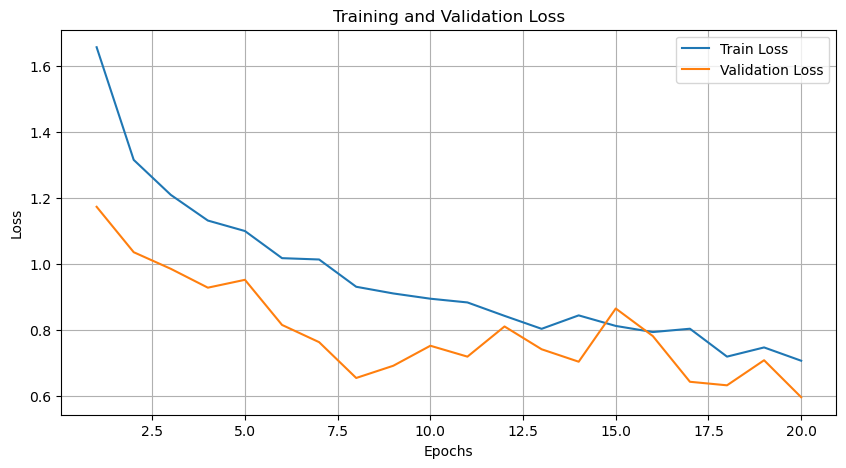

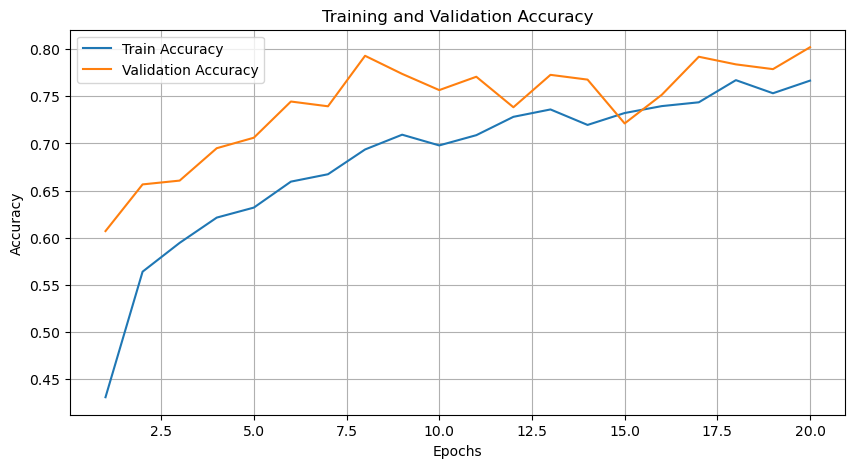

In [35]:
#Plot Training Results
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_acc_history, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

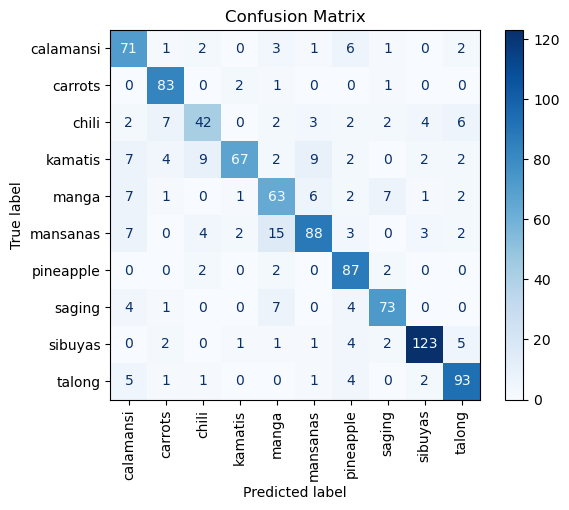

In [33]:
#visualize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Switch the model to evaluation mode
model.eval()

# Collect all true labels and predictions
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in dataloaders['val']:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


Classification Report:
              precision    recall  f1-score   support

   calamansi       0.69      0.82      0.75        87
     carrots       0.83      0.95      0.89        87
       chili       0.70      0.60      0.65        70
     kamatis       0.92      0.64      0.76       104
       manga       0.66      0.70      0.68        90
    mansanas       0.81      0.71      0.76       124
   pineapple       0.76      0.94      0.84        93
      saging       0.83      0.82      0.82        89
     sibuyas       0.91      0.88      0.90       139
      talong       0.83      0.87      0.85       107

    accuracy                           0.80       990
   macro avg       0.79      0.79      0.79       990
weighted avg       0.80      0.80      0.80       990


Per-Class Metrics:
       Class  Precision    Recall  F1-Score
0  calamansi   0.689320  0.816092  0.747368
1    carrots   0.830000  0.954023  0.887701
2      chili   0.700000  0.600000  0.646154
3    kamatis   0.91780

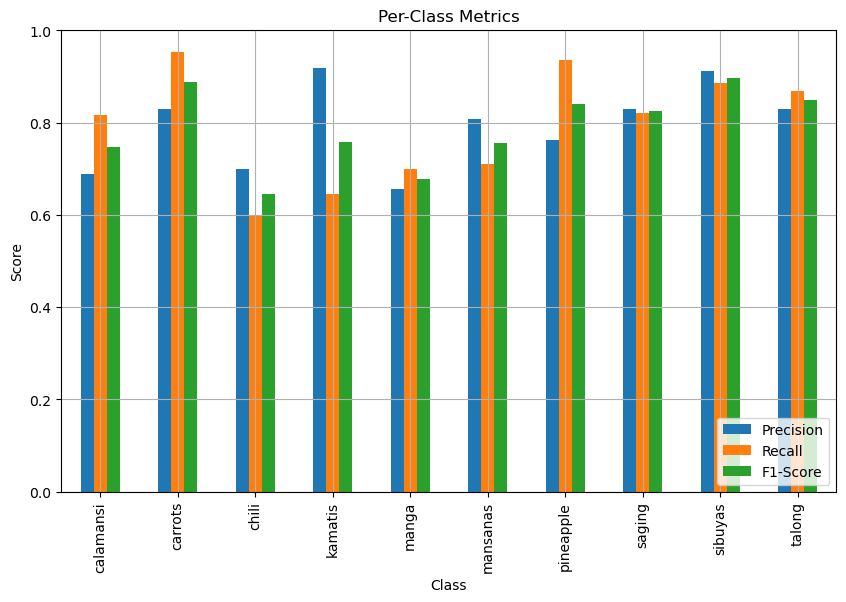

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Compute precision, recall, and F1 score
precision = precision_score(all_labels, all_preds, average=None)
recall = recall_score(all_labels, all_preds, average=None)
f1 = f1_score(all_labels, all_preds, average=None)

# Overall metrics (weighted average)
precision_weighted = precision_score(all_labels, all_preds, average='weighted')
recall_weighted = recall_score(all_labels, all_preds, average='weighted')
f1_weighted = f1_score(all_labels, all_preds, average='weighted')

# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Create a DataFrame for per-class metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
print("\nPer-Class Metrics:")
print(metrics_df)

# Visualize metrics as a bar chart
metrics_df.plot(x='Class', kind='bar', figsize=(10, 6), title="Per-Class Metrics")
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()